In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data = pd.read_csv("/home/mike/Downloads/data/archive(8)/Immigration_Madrid_2021.csv")
data.head()

,Unnamed: 0,Gender,Age,Studies,Nationality,Administrative_situation,Working
0,0,Women,51-65,College,España,Community,No
1,1,Women,51-65,College,Venezuela,ART,No
2,2,Women,18-30,Pre-college,Honduras,Refugee,No
3,3,Women,18-30,Pre-college,Venezuela,Community,No
4,4,Women,18-30,Pre-college,República Dominicana,Community_familiar,No


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                1523 non-null   int64 
 1   Gender                    1523 non-null   object
 2   Age                       1523 non-null   object
 3   Studies                   1523 non-null   object
 4   Nationality               1523 non-null   object
 5   Administrative_situation  1523 non-null   object
 6   Working                   1523 non-null   object
dtypes: int64(1), object(6)
memory usage: 83.4+ KB


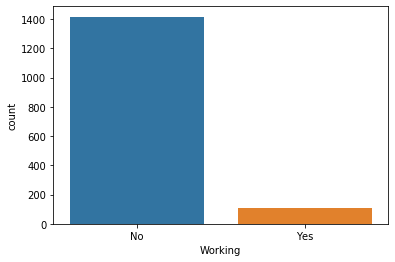

In [76]:
sns.countplot(data["Working"].astype('category'))

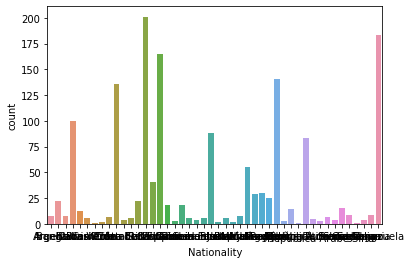

In [77]:
sns.countplot(data["Nationality"].astype('category'))

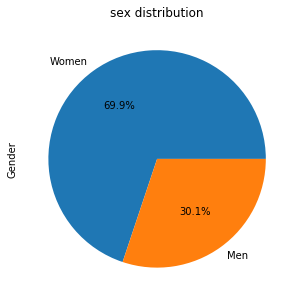

In [78]:
sex_count = data.Gender.value_counts()
sex_count.plot(kind= 'pie', figsize=(10, 5), autopct= '%1.1f%%')
plt.title('sex distribution')
plt.show()

In [79]:
data.head()

,Unnamed: 0,Gender,Age,Studies,Nationality,Administrative_situation,Working
0,0,Women,51-65,College,España,Community,No
1,1,Women,51-65,College,Venezuela,ART,No
2,2,Women,18-30,Pre-college,Honduras,Refugee,No
3,3,Women,18-30,Pre-college,Venezuela,Community,No
4,4,Women,18-30,Pre-college,República Dominicana,Community_familiar,No


In [80]:
data.Studies.value_counts()

Pre-college            524
College                326
High-school            311
Elementary_school      210
Vocational_training    125
No_studies              24
Unknown                  3
Name: Studies, dtype: int64

In [81]:
data.loc[data.Age=='18-30', 'Age']='adult'
data.loc[data.Age=='51-65', 'Age']='old'
data.loc[data.Age=='4-17', 'Age']='child'
data.loc[data.Age==' + 65', 'Age']='very_old'
data.loc[data.Age=='31-50', 'Age']='grown_up'

In [82]:
data.Age.value_counts()

adult       855
grown_up    453
old         163
child        49
very_old      3
Name: Age, dtype: int64

In [83]:
data.drop(data.columns[[0]], axis=1, inplace=True)

In [84]:
data.columns

Index(['Gender', 'Age', 'Studies', 'Nationality', 'Administrative_situation',
       'Working'],
      dtype='object')

In [85]:
data = data.astype("category")

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Gender                    1523 non-null   category
 1   Age                       1523 non-null   category
 2   Studies                   1523 non-null   category
 3   Nationality               1523 non-null   category
 4   Administrative_situation  1523 non-null   category
 5   Working                   1523 non-null   category
dtypes: category(6)
memory usage: 11.6 KB


In [87]:
data = pd.get_dummies(data,  drop_first=True)

In [88]:
data

,Gender_Women,Age_child,Age_grown_up,Age_old,Age_very_old,Studies_Elementary_school,Studies_High-school,Studies_No_studies,Studies_Pre-college,Studies_Unknown,...,Nationality_Somalia,Nationality_Togo,Nationality_Ucrania,Nationality_Venezuela,Administrative_situation_Community,Administrative_situation_Community_familiar,Administrative_situation_Irregular,Administrative_situation_Refugee,Administrative_situation_Student,Working_Yes
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1519,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1520,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1521,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [90]:
y = data[['Working_Yes']]

In [91]:
data.columns

Index(['Gender_Women', 'Age_child', 'Age_grown_up', 'Age_old', 'Age_very_old',
       'Studies_Elementary_school', 'Studies_High-school',
       'Studies_No_studies', 'Studies_Pre-college', 'Studies_Unknown',
       'Studies_Vocational_training', 'Nationality_Argentina',
       'Nationality_Bangladesh', 'Nationality_Bolivia', 'Nationality_Brasil',
       'Nationality_Cabo Verde', 'Nationality_Camerún', 'Nationality_Chile',
       'Nationality_China', 'Nationality_Colombia', 'Nationality_Costa Rica',
       'Nationality_Costa de Marfil', 'Nationality_Cuba',
       'Nationality_Ecuador', 'Nationality_El Salvador', 'Nationality_España',
       'Nationality_Filipinas', 'Nationality_Gambia', 'Nationality_Guatemala',
       'Nationality_Guinea', 'Nationality_Guinea Bissau',
       'Nationality_Guinea Ecuatorial', 'Nationality_Honduras',
       'Nationality_India', 'Nationality_Jamaica', 'Nationality_Kenya',
       'Nationality_Malí', 'Nationality_Marruecos', 'Nationality_Nicaragua',
       '

In [92]:
X = data[['Gender_Women', 'Age_child', 'Age_grown_up', 'Age_old', 'Age_very_old',
       'Studies_Elementary_school', 'Studies_High-school',
       'Studies_No_studies', 'Studies_Pre-college', 'Studies_Unknown',
       'Studies_Vocational_training', 'Nationality_Argentina',
       'Nationality_Bangladesh', 'Nationality_Bolivia', 'Nationality_Brasil',
       'Nationality_Cabo Verde', 'Nationality_Camerún', 'Nationality_Chile',
       'Nationality_China', 'Nationality_Colombia', 'Nationality_Costa Rica',
       'Nationality_Costa de Marfil', 'Nationality_Cuba',
       'Nationality_Ecuador', 'Nationality_El Salvador', 'Nationality_España',
       'Nationality_Filipinas', 'Nationality_Gambia', 'Nationality_Guatemala',
       'Nationality_Guinea', 'Nationality_Guinea Bissau',
       'Nationality_Guinea Ecuatorial', 'Nationality_Honduras',
       'Nationality_India', 'Nationality_Jamaica', 'Nationality_Kenya',
       'Nationality_Malí', 'Nationality_Marruecos', 'Nationality_Nicaragua',
       'Nationality_Nigeria', 'Nationality_Paraguay', 'Nationality_Perú',
       'Nationality_Polonia', 'Nationality_Portugal',
       'Nationality_República Democrática del Congo',
       'Nationality_República Dominicana', 'Nationality_República de Corea',
       'Nationality_República Árabe Siria', 'Nationality_Rumania',
       'Nationality_Sahara', 'Nationality_Senegal', 'Nationality_Sierra Leona',
       'Nationality_Somalia', 'Nationality_Togo', 'Nationality_Ucrania',
       'Nationality_Venezuela', 'Administrative_situation_Community',
       'Administrative_situation_Community_familiar',
       'Administrative_situation_Irregular',
       'Administrative_situation_Refugee', 'Administrative_situation_Student']]

In [93]:
X = data.values

In [94]:
X

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [95]:
y = y.values

In [96]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [97]:
from sklearn import linear_model

In [98]:
LRG = linear_model.LogisticRegression(random_state=0,solver='liblinear',multi_class='auto').fit(X, y)
LRG.score(X, y)

/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0